# Ground state (edge) delete worm

In [1]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon

### Simulation parameters

In [2]:
# Simulation parameters
N = 2
L = N*2   # half-filling
t = 0
U = 0.5
mu = -0.1
    
# PIMC parameters
beta = 1
eta = 1/np.sqrt(L*beta)      # worm end fugacity

### Delete worm near $\tau=0$

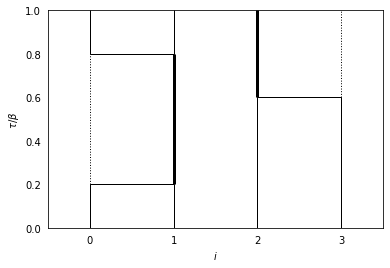

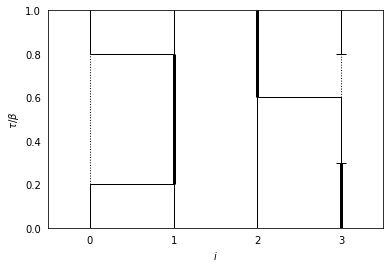

[3, 1]
[3, 3]


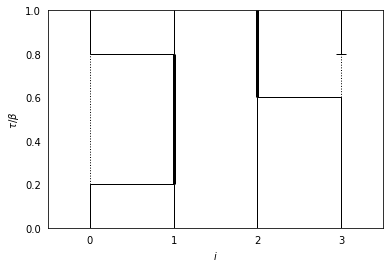

[]
[3, 2]


In [3]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)

pimc.view_worldlines(data_struct,beta,figure_name=None)

# Insert a worm from tau = 0
i = 3
n_after = data_struct[i][0][1]  # particles after worm end
n_before = n_after + 1 
tau_next = data_struct[i][1][0]
tau_prev = 0
worm_end_kink = [tau_prev+(tau_next-tau_prev)*0.5,n_after,(i,i)]
first_flat = [0,n_before,(i,i)]
data_struct[i].insert(1,worm_end_kink)
data_struct[i][0] = first_flat
head_loc = [i,1]

# Insert a worm from tau = beta
i = 3
k_last = len(data_struct[i])-1
n_i = data_struct[i][k_last][1]
tau_prev = data_struct[i][k_last][0]
worm_end_kink = [tau_prev+(beta-tau_prev)*0.5,n_i+1,(i,i)]
data_struct[i].append(worm_end_kink)
tail_loc = [i,k_last+1]

pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

# Delete a worm from tau = 0
pimc.delete_gsworm_zero(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

### Delete antiworm near $\tau=0$

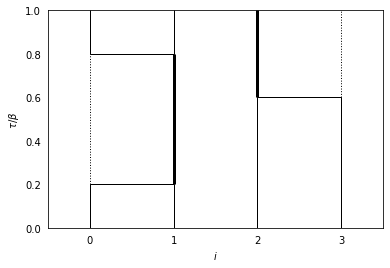

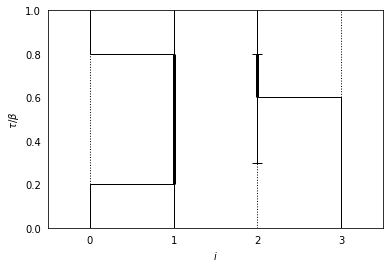

[2, 3]
[2, 1]


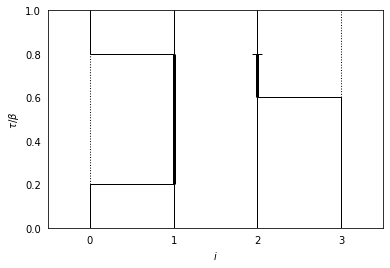

[2, 2]
[]


In [4]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)

pimc.view_worldlines(data_struct,beta,figure_name=None)

# Insert an antiworm from tau = 0
i = 2
n_after = data_struct[i][0][1]  # particles after worm end
n_before = n_after - 1 
tau_next = data_struct[i][1][0]
tau_prev = 0
worm_end_kink = [tau_prev+(tau_next-tau_prev)*0.5,n_after,(i,i)]
first_flat = [0,n_before,(i,i)]
data_struct[i].insert(1,worm_end_kink)
data_struct[i][0] = first_flat
tail_loc = [i,1]

# Insert a antiworm from tau = beta
i = 2
k_last = len(data_struct[i])-1
n_after = data_struct[i][k_last][1]
tau_prev = data_struct[i][k_last][0]
worm_end_kink = [tau_prev+(beta-tau_prev)*0.5,n_after-1,(i,i)]
data_struct[i].append(worm_end_kink)
head_loc = [i,k_last+1]

pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

# Delete a worm from tau = 0
pimc.delete_gsworm_zero(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

### Delete worm near $\tau=\beta$

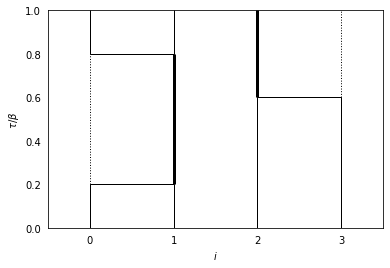

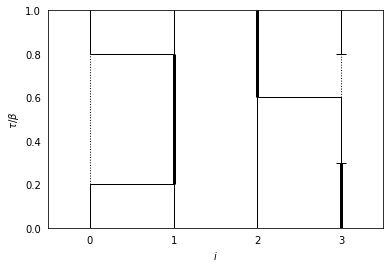

[3, 1]
[3, 3]


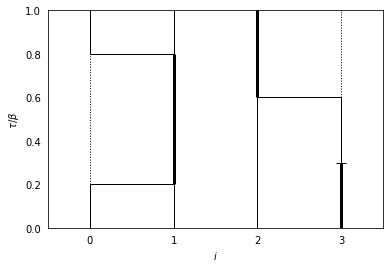

[3, 1]
[]


In [5]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)

pimc.view_worldlines(data_struct,beta,figure_name=None)

# Insert a worm from tau = 0
i = 3
n_after = data_struct[i][0][1]  # particles after worm end
n_before = n_after + 1 
tau_next = data_struct[i][1][0]
tau_prev = 0
worm_end_kink = [tau_prev+(tau_next-tau_prev)*0.5,n_after,(i,i)]
first_flat = [0,n_before,(i,i)]
data_struct[i].insert(1,worm_end_kink)
data_struct[i][0] = first_flat
head_loc = [i,1]

# Insert a worm from tau = beta
i = 3
k_last = len(data_struct[i])-1
n_i = data_struct[i][k_last][1]
tau_prev = data_struct[i][k_last][0]
worm_end_kink = [tau_prev+(beta-tau_prev)*0.5,n_i+1,(i,i)]
data_struct[i].append(worm_end_kink)
tail_loc = [i,k_last+1]

pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

# Delete a worm from tau = 0
pimc.delete_gsworm_beta(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

### Delete antiworm near $\tau=\beta$

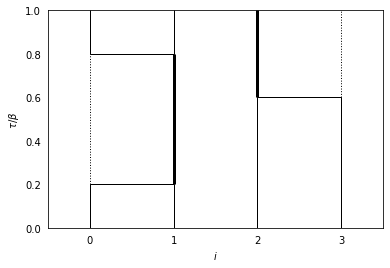

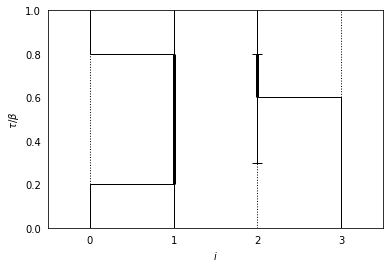

[2, 3]
[2, 1]


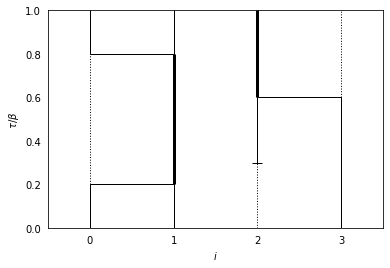

[]
[2, 1]


In [6]:
data_struct = []
x1 = [[0,1,(0,0)],[0.2,0,(0,1)],[0.8,1,(1,0)]]
x2 = [[0,1,(1,1)],[0.2,2,(0,1)],[0.8,1,(1,0)]]
x3 = [[0,1,(2,2)],[0.6,2,(3,2)]]
x4 = [[0,1,(3,3)],[0.6,0,(3,2)]]
data_struct.append(x1)
data_struct.append(x2)
data_struct.append(x3)
data_struct.append(x4)

pimc.view_worldlines(data_struct,beta,figure_name=None)

# Insert an antiworm from tau = 0
i = 2
n_after = data_struct[i][0][1]  # particles after worm end
n_before = n_after - 1 
tau_next = data_struct[i][1][0]
tau_prev = 0
worm_end_kink = [tau_prev+(tau_next-tau_prev)*0.5,n_after,(i,i)]
first_flat = [0,n_before,(i,i)]
data_struct[i].insert(1,worm_end_kink)
data_struct[i][0] = first_flat
tail_loc = [i,1]

# Insert a antiworm from tau = beta
i = 2
k_last = len(data_struct[i])-1
n_after = data_struct[i][k_last][1]
tau_prev = data_struct[i][k_last][0]
worm_end_kink = [tau_prev+(beta-tau_prev)*0.5,n_after-1,(i,i)]
data_struct[i].append(worm_end_kink)
head_loc = [i,k_last+1]

pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)

# Delete a worm from tau = 0
pimc.delete_gsworm_beta(data_struct, beta, head_loc, tail_loc, U, mu, eta)
pimc.view_worldlines(data_struct,beta,figure_name=None)
print(head_loc)
print(tail_loc)